In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as plt
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=2)


In [2]:
tesla = pd.read_csv("/Users/preetisawant/Library/Containers/com.microsoft.Excel/Data/Downloads/tesla.csv")
tesla.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
tesla.info()
#find total number of rows and columns
#returns datatype as well as nill values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [4]:
tesla.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200
2192,15-03-2019,283.510010,283.723999,274.399994,275.429993,275.429993,14758243


In [5]:
tesla['Date']=pd.to_datetime(tesla['Date'])

#converting Date column values to date and time format 

In [6]:
tesla.shape

(2193, 7)

In [7]:
print(f'Dataframe contains stock price between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total Dates = {(tesla.Date.min() -tesla.Date.max()).days}days')

#stock prices are declared in date-time format using the above function and also total number of days are declared

Dataframe contains stock price between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total Dates = -3617days


In [8]:
tesla.describe()
# summary statistics is stated here
# states count,mean,max,min from each column

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


<AxesSubplot:>

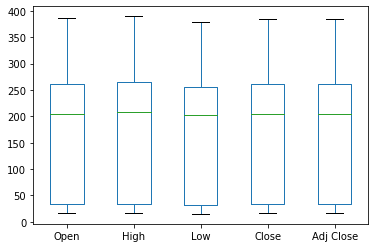

In [9]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')
#  boxplot used to visualize the distribution of values within each column.

In [12]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(tesla['Close'], color='black')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize = 18)
plt.show()

AttributeError: module 'chart_studio.plotly' has no attribute 'figure'

In [13]:
#setting layout for graph
layout=go.Layout(
    title='Stock prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Couries New,monospace',
            size = 18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Couries New,monospace',
            size = 18,
            color='#7f7f7f'
        )
    )
)

tesla_data=[{'x':tesla['Date'],'y':tesla['Close']}]
plot=go.Figure(data=tesla_data,layout=layout)

In [14]:
iplot(plot)
#plotting the graph


In [19]:
from sklearn.model_selection import train_test_split
#for building a regression model importing train_test_split from sklearn

# importing preprocessing functions from sklearn libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evalution
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [20]:
#spliting data into train and test sets
# x variable -> independent value/variable feature y-> dependend/target variable
#Random State:- Controls the shuffling applied to the data before applying the split.
#test_size:-represent the proportion of the dataset to include in the test split.

X=np.array(tesla.index).reshape(-1,1)
Y=tesla['Close']
X_train,X_set,Y_train,Y_set=train_test_split(X,Y ,test_size=0.3,random_state=101)


In [21]:
scaler=StandardScaler().fit(X_train)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
# from sklearn import linear_model

lm=LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [24]:
trace0=go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
tesla_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=tesla_data,layout=layout)



In [25]:
iplot(plot2)


In [26]:
# tesla[['Open','Close']].plot(kind='box')
# #created to display the summary of the set of data values having properties like

In [27]:
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [28]:
# create a new data frame with only 'Close column'
data = tesla.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

1755

In [29]:
#scale the data
#pre-process this data before applying stock price using LSTM. 
#Transform the values in our data with help of the fit_transform function. 
#Min-max scaler is used for scaling the data so that we can bring all the price values to a common scale. 
#We then use 80 % data for training and the rest 20% for testing and assign them to separate variables.
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       ...,
       [0.73986996],
       [0.74257852],
       [0.70322317]])

In [30]:
#create the training dataset
#create the scaled training dataset
#X_train is a nested list, which contains lists of 60 time-stamp prices.
# y_train is a list of stock prices which is the next day stock price, corresponding to each list in X_train.
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.02191224, 0.02174973, 0.01668472, 0.0092091 , 0.00083966,
       0.        , 0.00449621, 0.00433369, 0.0033857 , 0.00633803,
       0.01094258, 0.011078  , 0.01310942, 0.0165493 , 0.01218851,
       0.01197183, 0.01408451, 0.01486999, 0.01394908, 0.01286565,
       0.01332611, 0.01232394, 0.01121344, 0.01386782, 0.01665764,
       0.01478873, 0.0125948 , 0.01026544, 0.01029252, 0.00874865,
       0.00568797, 0.00487541, 0.00682557, 0.00807151, 0.00907367,
       0.00804442, 0.00809859, 0.00893824, 0.01172806, 0.0092091 ,
       0.01110509, 0.01069881, 0.01056338, 0.01102384, 0.0099675 ,
       0.0125948 , 0.01424702, 0.01421993, 0.01283857, 0.01381365,
       0.01329902, 0.0118364 , 0.01332611, 0.01440954, 0.01673889,
       0.013922  , 0.01199892, 0.01424702, 0.01346154, 0.01102384])]
[0.010184179306608886]



In [31]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)


In [32]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1695, 60, 1)

In [33]:
#Build the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [34]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [42]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
1695/1695 [==============================] - 23s 14ms/step - loss: 3.4367e-04
Epoch 2/10
1695/1695 [==============================] - 23s 13ms/step - loss: 2.9206e-04
Epoch 3/10
1695/1695 [==============================] - 23s 14ms/step - loss: 3.2797e-04
Epoch 4/10
1695/1695 [==============================] - 23s 14ms/step - loss: 2.9704e-04
Epoch 5/10
1695/1695 [==============================] - 23s 14ms/step - loss: 3.0224e-04
Epoch 6/10
1695/1695 [==============================] - 23s 14ms/step - loss: 2.8646e-04
Epoch 7/10
1695/1695 [==============================] - 23s 14ms/step - loss: 2.8735e-04
Epoch 8/10
1695/1695 [==============================] - 23s 14ms/step - loss: 2.6087e-04
Epoch 9/10
1695/1695 [==============================] - 24s 14ms/step - loss: 2.8782e-04
Epoch 10/10
1695/1695 [==============================] - 24s 14ms/step - loss: 3.0130e-04


In [43]:
#create the testing data sets
#create a new array containing scale values from index 1543 to 2003
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [44]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [45]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(438, 60, 1)

In [46]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 0s 11ms/step


In [47]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.729177054451163

<ipython-input-41-33d98546dee5>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: Unrecognized location 'upper_center'. Valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center


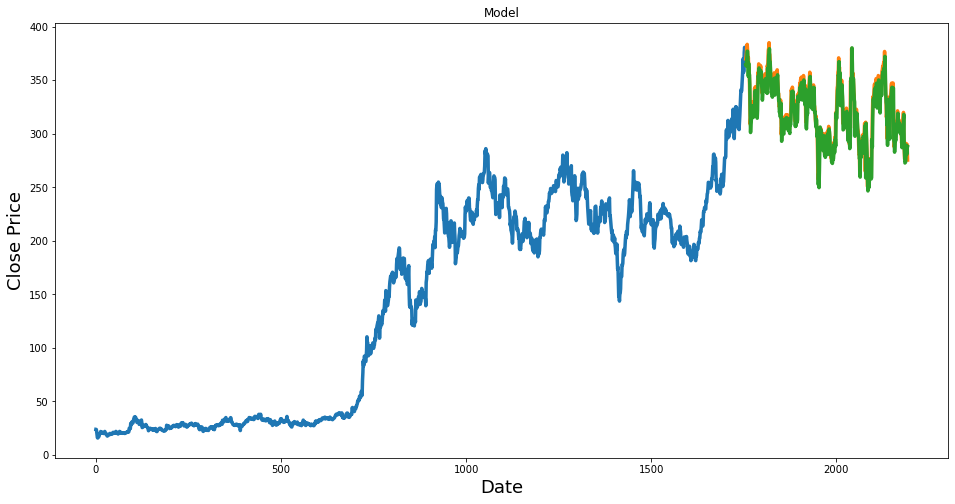

In [41]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper_center')

In [48]:
#show the valid and predicted price
valid


,Close,Predictions
1755,369.799988,364.291870
1756,372.239990,363.228363
1757,376.399994,366.295593
1758,382.609985,370.709778
1759,383.450012,377.084290
...,...,...
2188,290.920013,282.165100
2189,283.359985,289.326721
2190,288.959991,280.682953
2191,289.959991,286.707397
